### 1. 18_Charge_data.csv 와 18_Customer_data.csv를 불러와 각각 df_charge, df_customer로 선언 후, 데이터의 구조와 타입확인


In [272]:
import pandas as pd
df_charge= pd.read_csv(r"C:\Users\hanjw\Desktop\python\실습파일\18_Charge_data.csv", encoding='cp949')
df_customer= pd.read_csv(r"C:\Users\hanjw\Desktop\python\실습파일\18_Customer_data.csv", encoding='cp949')
print(df_charge.info())
print(df_customer.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291334 entries, 0 to 291333
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  291334 non-null  int64 
 1   고객ID        291334 non-null  object
 2   과금일         291334 non-null  object
 3   과금액         291334 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 8.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6863 entries, 0 to 6862
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6863 non-null   int64 
 1   고객ID        6863 non-null   object
 2   성별          6863 non-null   object
 3   연령          6863 non-null   int64 
 4   결혼여부        6863 non-null   object
 5   부양자유무       6863 non-null   object
 6   부양자수        6863 non-null   int64 
 7   추천횟수        6863 non-null   int64 
 8   영수증발급여부     6863 non-null   object
 9   과금방식        6863 non-null   object
 1

### 2. 매출에 대한 추세를 분석하고자 한다. 시간이 지남에 따라 고객들이 지불하는 총과금액과 평균과금액에 대한 추세를 시각화로 확인하시오.


In [273]:
import seaborn as sns
import matplotlib.pyplot as plt
df= df_charge.merge(df_customer, on="고객ID")
df['과금일'] =pd.to_datetime(df['과금일'])
grouped_df = df.groupby('과금일')['과금액'].agg(['sum', 'mean']).reset_index()
grouped_df

# plt.figure(figsize=(12, 6))
# sns.barplot(x='과금일', y='sum', data=grouped_df, hue='mean')
# plt.show()

,과금일,sum,mean
0,2015-01-01,33668700,94575.000000
1,2015-02-01,47767700,91860.961538
2,2015-03-01,57274900,91057.074722
3,2015-04-01,64441700,89751.671309
4,2015-05-01,72681700,89180.000000
...,...,...,...
79,2021-08-01,438558700,74496.127060
80,2021-09-01,425799900,74090.812598
81,2021-10-01,416085400,73800.177368
82,2021-11-01,394237700,72966.444568


<Axes: xlabel='과금일', ylabel='sum'>

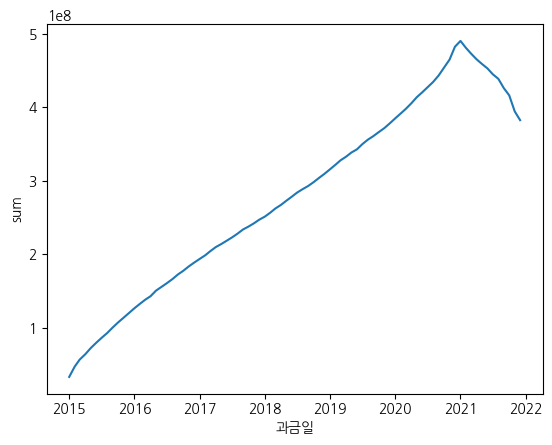

In [274]:
import koreanize_matplotlib
sns.lineplot(data = grouped_df, x = '과금일',y='sum')


<Axes: xlabel='과금일', ylabel='mean'>

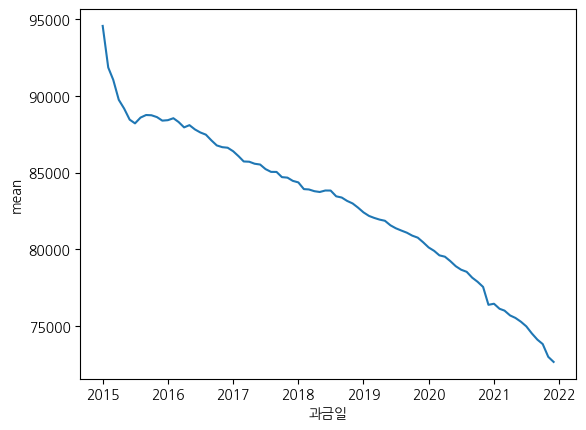

In [275]:
sns.lineplot(data = grouped_df, x = '과금일',y='mean')

In [276]:
df.columns

Index(['Unnamed: 0_x', '고객ID', '과금일', '과금액', 'Unnamed: 0_y', '성별', '연령',
       '결혼여부', '부양자유무', '부양자수', '추천횟수', '영수증발급여부', '과금방식', '보안서비스', '백업서비스',
       '기술지원서비스', '데이터무제한', '데이터사용량', '시작일', '종료일', '고객이탈여부', '이탈가능점수', '이탈유형',
       '이탈사유', 'LTV', '만족도', '데이터사용료', '로밍사용료', '총로밍요금'],
      dtype='object')

### 3. 고객의 기본적인 특성(성별/연령대/결혼여부/부양자여부)와 서비스유지/이탈고객의 유의미한 차이가 있는지 확인하시오.


In [277]:
def age(x):
    if x//10 < 2:
        return '미성년'
    elif x//10==2:
        return "20대"
    elif x//10==3:
        return "30대"
    elif x//10==4:
        return "40대"
    elif x//10==5:
        return "50대"
    elif x//10==6:
        return "60대"
    else:
        return "노년층"
    
df['연령대']=df['연령'].apply(age)

In [278]:
import scipy.stats as stats
idx= ['성별','연령대','결혼여부','부양자유무']
idx2= ['고객이탈여부']

for i in idx:
    p1= pd.crosstab(index= df['고객이탈여부'], columns= df[i])
    p1
    a, p, n, table=stats.chi2_contingency(p1)
    print(f"{i}:카이제곱 통계량:{a}, p-value값:{p}")

성별:카이제곱 통계량:47.48506380021811, p-value값:5.542463916444489e-12
연령대:카이제곱 통계량:4276.48950843648, p-value값:0.0
결혼여부:카이제곱 통계량:488.08552568429144, p-value값:3.718617996394689e-108
부양자유무:카이제곱 통계량:9771.92338646142, p-value값:0.0


### 4. 고객의 정보를 입력했을 때, 해당 고객이 이탈할 확률에 대한 분류모델을 생성하고, 평가 한 뒤, 각 고객정보가 이탈 확률에 얼마나 영향을 주고 있는가를 확인하시오.
    - 필수로 들어가야 할 정보 : 고객 기본정보 (성별 / 연령 등)
    - 추가로 고려할 정보 : 고객의 서비스 가입 정보 (보안 / 기술지원 등), 만족도 등


In [279]:
df[['고객이탈여부']]

,고객이탈여부
0,No
1,No
2,No
3,No
4,No
...,...
291329,No
291330,No
291331,No
291332,No


In [280]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [281]:
from sklearn.preprocessing import LabelEncoder

encoder= LabelEncoder()
df['성별']= encoder.fit_transform(df['성별']) 
df['보안서비스']= encoder.fit_transform(df['보안서비스']) 
df['기술지원서비스']= encoder.fit_transform(df['기술지원서비스']) 
data= df[['성별','연령','보안서비스','기술지원서비스','만족도']] # 성별 보안서비스 기술지원서비스 라벨 인코딩
target= df['고객이탈여부']

ss = StandardScaler()
train_scaled = ss.fit_transform(train_x)
test_scaled = ss.transform(test_x)

train_x, test_x, train_y, test_y = train_test_split(data, target)

lg= LogisticRegression()
lg.fit(train_scaled, train_y)
print(lg.score(test_scaled, test_y))
print(lg.score(train_scaled, train_y))

0.8803443446741906
0.8790755148741419


### 5. 두 데이터를 활용해 한 명의 고객이 결제한 총 결제금액을 고객 ID 별로 정리하고, 한명의 고객 금액, 과금 빈도, 최근성등을 이용해, RFM 분석을 실시해 고객을 5등급으로 분류하시오.
    - 금액은 0.5 / 빈도는 기간 내 전체 빈도로 0.3 / 최근성은 -0.2 가중치 부여


# reset_index 꼭 해줄 것!

In [284]:
a = max(df['과금일']) - df['과금일']
df["Recency"]=a.dt.days

df['freq']=1
p2=df.pivot_table(index='고객ID', values= 'freq', aggfunc = 'sum').reset_index()
A=df[['고객ID','Recency']]

p3=df.pivot_table(index='고객ID', values='과금액', aggfunc='sum').reset_index()
p3

,고객ID,과금액
0,C-10001,1755400
1,C-10002,1447500
2,C-10003,490900
3,C-10004,1578400
4,C-10005,378000
...,...,...
6858,C-17039,1610700
6859,C-17040,2343500
6860,C-17041,792400
6861,C-17042,6328500


In [283]:
df

,Unnamed: 0_x,고객ID,과금일,과금액,Unnamed: 0_y,성별,연령,결혼여부,부양자유무,부양자수,...,이탈유형,이탈사유,LTV,만족도,데이터사용료,로밍사용료,총로밍요금,연령대,Recency,freq
0,0,C-10001,2020-04-01,84600,0,1,37,Yes,No,0,...,NaN,NaN,2205,3,0,47910,431100,30대,609,1
1,1,C-10001,2020-05-01,83500,0,1,37,Yes,No,0,...,NaN,NaN,2205,3,0,47910,431100,30대,579,1
2,2,C-10001,2020-06-01,85700,0,1,37,Yes,No,0,...,NaN,NaN,2205,3,0,47910,431100,30대,548,1
3,3,C-10001,2020-07-01,83500,0,1,37,Yes,No,0,...,NaN,NaN,2205,3,0,47910,431100,30대,518,1
4,4,C-10001,2020-08-01,84600,0,1,37,Yes,No,0,...,NaN,NaN,2205,3,0,47910,431100,30대,487,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291329,291329,C-17043,2021-08-01,68300,6862,0,36,Yes,No,0,...,NaN,NaN,5639,3,0,0,0,30대,122,1
291330,291330,C-17043,2021-09-01,69500,6862,0,36,Yes,No,0,...,NaN,NaN,5639,3,0,0,0,30대,91,1
291331,291331,C-17043,2021-10-01,68300,6862,0,36,Yes,No,0,...,NaN,NaN,5639,3,0,0,0,30대,61,1
291332,291332,C-17043,2021-11-01,69500,6862,0,36,Yes,No,0,...,NaN,NaN,5639,3,0,0,0,30대,30,1


In [254]:
new=new.rename(columns={"과금액":"Monetary",'freq':'Frequency'})
new['total']=new['Recency']*-0.2 + new['Frequency']*0.3+new['Monetary']*0.5
new

,고객ID,Frequency,Recency,Monetary,total
0,C-10001,21,609,1755400,877584.5
1,C-10001,21,579,1755400,877590.5
2,C-10001,21,548,1755400,877596.7
3,C-10001,21,518,1755400,877602.7
4,C-10001,21,487,1755400,877608.9
...,...,...,...,...,...
291329,C-17043,75,122,5196100,2598048.1
291330,C-17043,75,91,5196100,2598054.3
291331,C-17043,75,61,5196100,2598060.3
291332,C-17043,75,30,5196100,2598066.5


In [287]:
def func(x):
    
    global a,b,c,d
    
    if x >= a:
        return "A"
    elif x>=b:
        return "B"
    elif x>=c:
        return 'C'
    elif x>=d:
        return 'D'
    else:
        return 'E'

# new['total'].apply(func)

a = new['total'].quantile(0.8)
b = new['total'].quantile(0.6)
c = new['total'].quantile(0.4)
d = new['total'].quantile(0.2)

new['등급']=new['total'].apply(func)
new=new.drop_duplicates()
new

C:\Users\hanjw\AppData\Local\Temp\ipykernel_25236\341364884.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['등급']=new['total'].apply(func)


,고객ID,Frequency,Recency,Monetary,total,등급,연령대_x,연령대_y
0,C-10001,21,609,1755400,877584.5,D,30대,30대
21,C-10001,21,579,1755400,877590.5,D,30대,30대
42,C-10001,21,548,1755400,877596.7,D,30대,30대
63,C-10001,21,518,1755400,877602.7,D,30대,30대
84,C-10001,21,487,1755400,877608.9,D,30대,30대
...,...,...,...,...,...,...,...,...
17093929,C-17043,75,122,5196100,2598048.1,C,30대,30대
17094004,C-17043,75,91,5196100,2598054.3,C,30대,30대
17094079,C-17043,75,61,5196100,2598060.3,C,30대,30대
17094154,C-17043,75,30,5196100,2598066.5,C,30대,30대


### 6. 5등급으로 부여된 고객 등급 별 고객 연령대의 비율이 어떻게 달라지는지 계산하시오.

In [288]:
pd.crosstab(index= new['등급'], columns=new['연령대_x'], normalize='index',margins= True)

연령대_x,20대,30대,40대,50대,60대,노년층
등급,,,,,,
A,0.185903,0.182419,0.185869,0.160039,0.150789,0.134982
B,0.195788,0.182934,0.173752,0.180685,0.128958,0.137883
C,0.195243,0.171730,0.177702,0.168417,0.153812,0.133096
D,0.206412,0.170422,0.196646,0.196063,0.144953,0.085503
E,0.208094,0.199015,0.227642,0.185971,0.131481,0.047797
All,0.198288,0.181304,0.192322,0.178235,0.141999,0.107852
